import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\hi\OneDrive\Desktop\AI_dataset.csv'
data = pd.read_csv(file_path)

In [3]:
data.fillna({
    'Gender': 'Unknown',
    'Married': 'Unknown',
    'Dependents': 'Unknown',
    'Self_Employed': 'Unknown',
    'LoanAmount': data['LoanAmount'].mean(),
    'Loan_Amount_Term': data['Loan_Amount_Term'].mode()[0],
    'Credit_History': data['Credit_History'].mode()[0],
}, inplace=True)

<Figure size 576x432 with 0 Axes>

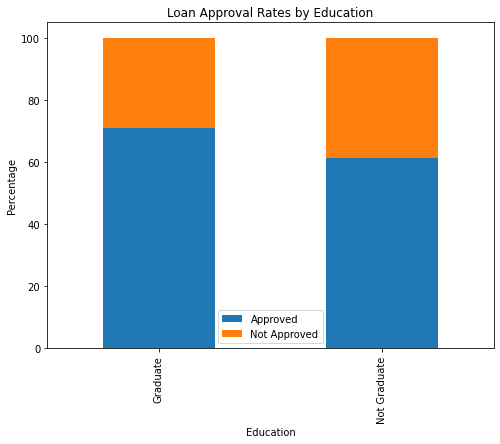

In [4]:
plt.figure(figsize=(8, 6))
edu_approval = data.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack() * 100
edu_approval[['Y', 'N']].plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], figsize=(8, 6))
plt.title('Loan Approval Rates by Education')
plt.ylabel('Percentage')
plt.xlabel('Education')
plt.legend(['Approved', 'Not Approved'])
plt.show()


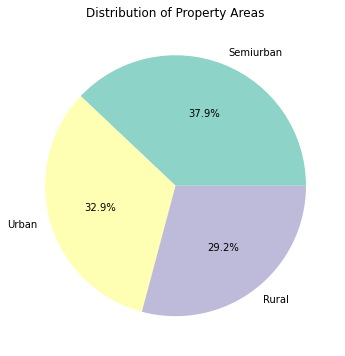

In [5]:
plt.figure(figsize=(6, 6))
property_distribution = data['Property_Area'].value_counts()
property_distribution.plot.pie(autopct='%1.1f%%', colors=['#8dd3c7', '#ffffb3', '#bebada'])
plt.title('Distribution of Property Areas')
plt.ylabel('')
plt.show()

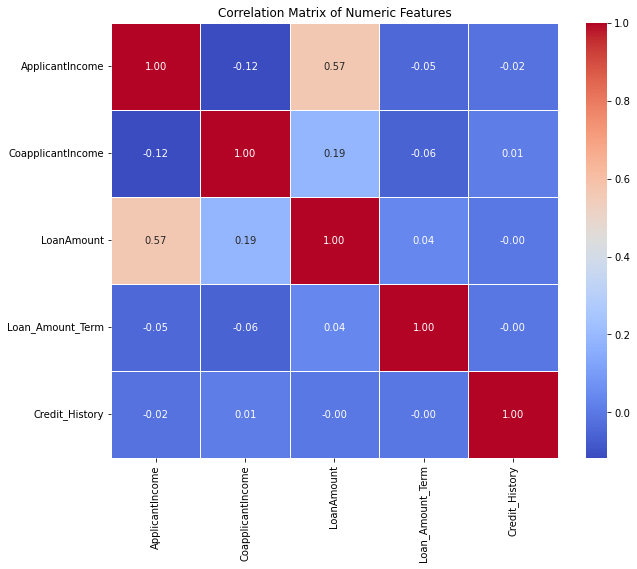

In [6]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()


In [8]:
print("Summary Statistics:")
print(data.describe())

Summary Statistics:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  146.412162        342.410423   
std        6109.041673        2926.248369   84.037468         64.428629   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


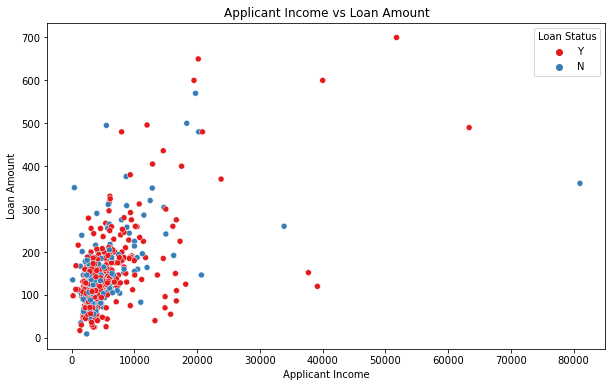

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=data, palette='Set1')
plt.title('Applicant Income vs Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()


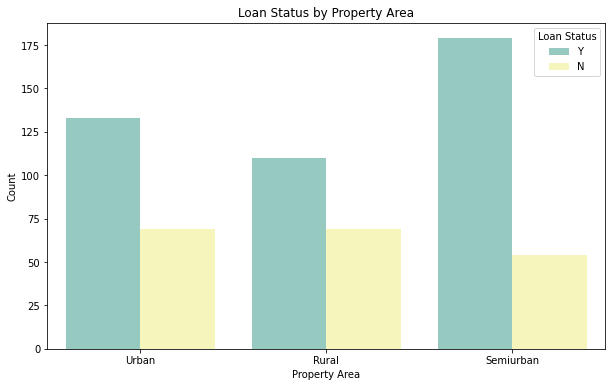

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=data, palette='Set3')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib
import os


file_path = r'C:\Users\hi\OneDrive\Desktop\AI_dataset.csv'


if not os.path.exists(file_path):
    print(f"Error: Dataset file '{file_path}' not found. Please provide the correct file path.")
    exit()


df = pd.read_csv(file_path)


df = df.dropna(subset=['Loan_Status'])

numerical_columns = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())


categorical_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])


label_encoders = {}
for col in categorical_columns + ['Education', 'Property_Area', 'Loan_Status']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


X = df.drop(columns=['Loan_ID', 'Loan_Status'])
y = df['Loan_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


joblib.dump(model, 'loan_prediction_model.pkl')


def predict_loan_status(input_data):
    input_df = pd.DataFrame([input_data], columns=X.columns)

    for col in categorical_columns + ['Education', 'Property_Area']:
        input_df[col] = label_encoders[col].transform(input_df[col])
        
    prediction = model.predict(input_df)
    return "Approved" if prediction[0] == 1 else "Rejected"

new_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': '0',
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 5000,
    'CoapplicantIncome': 2000,
    'LoanAmount': 150,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 'Urban'
}
print(f"Loan Prediction: {predict_loan_status(new_data)}")

Accuracy: 75.61%
Confusion Matrix:
[[18 25]
 [ 5 75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123

Loan Prediction: Approved
